In [1]:
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

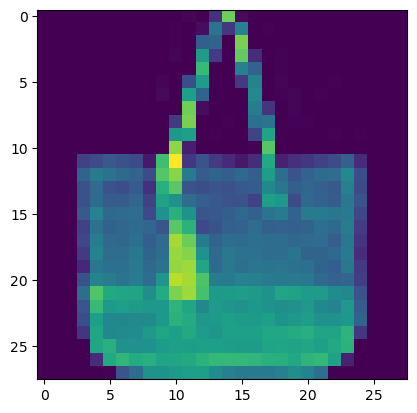

In [3]:
plt.imshow(training_images[np.random.randint(100)])

In [4]:
def reshape_and_normalize(images):
    images = np.expand_dims(images, axis=-1)
    images = images/255.0
    return images

In [5]:
training_images = reshape_and_normalize(training_images)
test_images = reshape_and_normalize(test_images)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #------------------------------------------------------------------------------
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(training_images, training_labels, epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2508 - accuracy: 0.9073 - val_loss: 0.2757 - val_accuracy: 0.8987
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2175 - accuracy: 0.9184 - val_loss: 0.2668 - val_accuracy: 0.9024
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1909 - accuracy: 0.9287 - val_loss: 0.2557 - val_accuracy: 0.9096
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1661 - accuracy: 0.9378 - val_loss: 0.2578 - val_accuracy: 0.9099
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1460 - accuracy: 0.9448 - val_loss: 0.2686 - val_accuracy: 0.9099


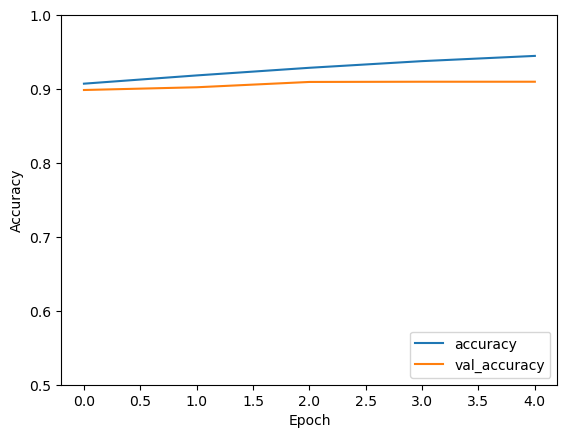

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')